In [ ]:
!pip install --user gcrnet
# If you are running this notebook on Google Colab, please reset the current python environment via 'Runtime -> Restart runtime' after installation.

In [2]:
from gcrnet.utils import simulate_data
from gcrnet import GCRNet
import numpy as np
import pandas as pd
import torch


C:\Users\bl242\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Prepare dataset

In [3]:
train_data=simulate_data(n_samples=300, n_features=20, scale=2, shape=2)
test_data=simulate_data(n_samples=300, n_features=20, scale=2, shape=2)

## Standardize dataset 

In [5]:
# # standardize dataset in real application
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # Fit the scaler on the training data
# scaler.fit(train_data['X'])
# train_data['X'] = scaler.fit_transform(train_data['X'])
# test_data['X'] = scaler.fit_transform(test_data['X'])

## Instantiate the GCRNet trainer

In [4]:
lam=np.exp(np.linspace(np.log(0.01),np.log(0.5), 50))
gmcp_net = GCRNet(task_type='cox',device=torch.device("cpu"), input_dim=train_data['X'].shape[1], output_dim=1, hidden_dims=[10,5], activation="relu",
    optimizer="Adam",learning_rate=0.001, batch_size=train_data['X'].shape[0], 
    alpha=0.01, lam=lam, penalty="MCP",drop_input=True)



## Train model

In [5]:
#param_grid={'alpha':np.exp(np.linspace(np.log(0.001),np.log(0.1), 10))}
param_grid={'alpha':[0.02]}
gmcp_net= gmcp_net.fit_and_validate(X=train_data['X'], y=pd.DataFrame({'E': train_data['E'], 'T': train_data['T']}), 
                              param_grid=param_grid, num_epochs=200, verbose=True, print_interval=200)

Epoch: 200: loss=4.341882228851318
Epoch: 400: loss=4.134621620178223
Epoch: 600: loss=3.990004539489746
Epoch: 800: loss=3.8362009525299072
Epoch: 1000: loss=3.790201425552368
Epoch: 1200: loss=3.7661025524139404
Epoch: 1400: loss=3.7560718059539795
Epoch: 1600: loss=3.7512898445129395
Epoch: 1800: loss=3.748546600341797
Epoch: 2000: loss=3.7473111152648926
Lambda0=0.010000000000000004, size=13
Epoch: 200: loss=3.749045598715438
Lambda1=0.010831107274360414, size=13
Epoch: 200: loss=3.7455247598160355
Lambda2=0.011731288478870311, size=13
Epoch: 200: loss=3.7483639595021105
Lambda3=0.012706284398111268, size=13
Epoch: 200: loss=3.7532954831210037
Lambda4=0.013762312937447512, size=13
Epoch: 200: loss=3.7588228033559865
Lambda5=0.014906108776881212, size=13
Epoch: 200: loss=3.7660393640042344
Lambda6=0.01614496632056856, size=13
Epoch: 200: loss=3.7747534454760854
Lambda7=0.017486786215901412, size=13
Epoch: 200: loss=3.7850837904290313
Lambda8=0.018940125738823508, size=13
Epoch: 200:

## Solution path

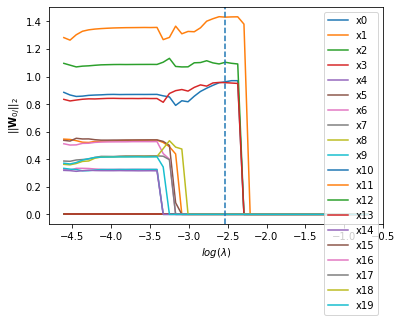

[ True  True  True  True False False False False False False False False
 False False False False False False False False]
best_lam=0.07970660072450483, best_params={'alpha': 0.02}


In [6]:
gmcp_net.plot_solution_path(legend=True, best=True)
print(gmcp_net.get_selection())
print(f'best_lam={gmcp_net.lam[gmcp_net.best_lam_ind]}, best_params={gmcp_net.best_params}')

## Evaluating the model

In [7]:
CI_train = gmcp_net.score(X=train_data['X'], y=pd.DataFrame({'E': train_data['E'], 'T': train_data['T']}), best=True)
CI_test=gmcp_net.score(X=test_data['X'], y=pd.DataFrame({'E': test_data['E'], 'T': test_data['T']}), best=True)
print(f'train_CI={CI_train} test_CI={CI_test}')

train_CI=0.8764630046260017 test_CI=0.8240036740317396
